In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from collections import Counter
import copy
import statsmodels.api as sm



In [51]:
#### read data from csv file
df = pd.read_csv("~/Documents/Data/used_car.csv",usecols=["title","price","condition","others","body_style"])
df.head()

,title,price,condition,others,body_style
0,2014 Audi S6 Prestige,"$42,991","39,682 mi.\nUsed",Exterior Color: Phantom Black Pearl Effect\nI...,sedan
1,2017 Audi A4 2.0T Premium Plus,"$38,414","9,408 mi.\nCertified",Exterior Color: Moonlight Blue Metallic\nInte...,sedan
2,2017 Audi A6 3.0T Premium Plus quattro,"$49,464","7,658 mi.\nCertified",Exterior Color: Glacier White Metallic\nInter...,sedan
3,2017 Audi A6 3.0T Premium Plus quattro,"$49,404","7,443 mi.\nCertified",Exterior Color: Mythos Black Metallic\nInteri...,sedan
4,2015 Audi A6 3.0T Premium Plus quattro,"$35,750","46,268 mi.\nUsed",Exterior Color: Dark Blue\nInterior Color: N...,sedan


In [52]:
### get dimensions of dataset
print(df.shape)
print(df.body_style.value_counts())

(36604, 5)
sedan    18718
SUV      17886
Name: body_style, dtype: int64


In [53]:
## data cleaning
### information was post differently for each car, 
### we have to extract information accordingly given different length of titles

regex = re.compile("\d+")  ### regular expression to check if the title starts with the year

def get_year(row):
    if re.match(regex,row):
        year = row.split(" ")[0]
    else:
        year = "Not Specified"
    return year

df["year"] = df["title"].apply(get_year)
df.head()


,title,price,condition,others,body_style,year
0,2014 Audi S6 Prestige,"$42,991","39,682 mi.\nUsed",Exterior Color: Phantom Black Pearl Effect\nI...,sedan,2014
1,2017 Audi A4 2.0T Premium Plus,"$38,414","9,408 mi.\nCertified",Exterior Color: Moonlight Blue Metallic\nInte...,sedan,2017
2,2017 Audi A6 3.0T Premium Plus quattro,"$49,464","7,658 mi.\nCertified",Exterior Color: Glacier White Metallic\nInter...,sedan,2017
3,2017 Audi A6 3.0T Premium Plus quattro,"$49,404","7,443 mi.\nCertified",Exterior Color: Mythos Black Metallic\nInteri...,sedan,2017
4,2015 Audi A6 3.0T Premium Plus quattro,"$35,750","46,268 mi.\nUsed",Exterior Color: Dark Blue\nInterior Color: N...,sedan,2015


In [54]:
def get_make(row):
    if re.match(regex,row):
        make = row.split(" ")[1]
    else:
        make = row.split(" ")[0]
    return make
df["make"] = df["title"].apply(get_make)
df.head()

,title,price,condition,others,body_style,year,make
0,2014 Audi S6 Prestige,"$42,991","39,682 mi.\nUsed",Exterior Color: Phantom Black Pearl Effect\nI...,sedan,2014,Audi
1,2017 Audi A4 2.0T Premium Plus,"$38,414","9,408 mi.\nCertified",Exterior Color: Moonlight Blue Metallic\nInte...,sedan,2017,Audi
2,2017 Audi A6 3.0T Premium Plus quattro,"$49,464","7,658 mi.\nCertified",Exterior Color: Glacier White Metallic\nInter...,sedan,2017,Audi
3,2017 Audi A6 3.0T Premium Plus quattro,"$49,404","7,443 mi.\nCertified",Exterior Color: Mythos Black Metallic\nInteri...,sedan,2017,Audi
4,2015 Audi A6 3.0T Premium Plus quattro,"$35,750","46,268 mi.\nUsed",Exterior Color: Dark Blue\nInterior Color: N...,sedan,2015,Audi


In [55]:
### create a new column "title_length" 
def title_length(row):
    length = len(row.split(" "))
    return length
df["title_length"] = df["title"].apply(title_length)

df.title_length.value_counts()



4     23470
5      8914
6      2036
3      1238
7       731
8       178
9        19
2        15
11        2
10        1
Name: title_length, dtype: int64

In [56]:
#### extract model based on length of title

def get_model(row):
    if len(row.split(" ")) == 2:
        if re.match(regex,row):
            model = "Not Specified"
        else:
            model = row.split(" ")[1]
    if len(row.split(" ")) >= 3:
        if re.match(regex,row):
            model = row.split(" ")[2]
        else:
            model = row.split(" ")[1]
    return model
df["model"] = df["title"].apply(get_model)
df.head()

,title,price,condition,others,body_style,year,make,title_length,model
0,2014 Audi S6 Prestige,"$42,991","39,682 mi.\nUsed",Exterior Color: Phantom Black Pearl Effect\nI...,sedan,2014,Audi,4,S6
1,2017 Audi A4 2.0T Premium Plus,"$38,414","9,408 mi.\nCertified",Exterior Color: Moonlight Blue Metallic\nInte...,sedan,2017,Audi,6,A4
2,2017 Audi A6 3.0T Premium Plus quattro,"$49,464","7,658 mi.\nCertified",Exterior Color: Glacier White Metallic\nInter...,sedan,2017,Audi,7,A6
3,2017 Audi A6 3.0T Premium Plus quattro,"$49,404","7,443 mi.\nCertified",Exterior Color: Mythos Black Metallic\nInteri...,sedan,2017,Audi,7,A6
4,2015 Audi A6 3.0T Premium Plus quattro,"$35,750","46,268 mi.\nUsed",Exterior Color: Dark Blue\nInterior Color: N...,sedan,2015,Audi,7,A6


In [58]:
#### year,make and model would be enough for my analysis, there is no need to extract addition info from title column

#### clean price 

def clean_price(row):
    price = row.replace("$","").replace(",","")
    if re.match(regex,price):
        return int(price)
    else:
        return price
df["price"] = df["price"].apply(clean_price)

#### get mileage and status

def get_mileage(row):
    if re.match(regex,row):
        mileage = row.split("\n")[0].replace(",","").replace("mi.","").strip()
        return int(mileage)
    else:
        mileage = "Not Specified"
        return mileage
df["mileage"] = df["condition"].apply(get_mileage)

def get_status(row):
    if re.match(regex,row):
        status = row.split("\n")[1]
    else:
        status = row
    return status
df["status"] = df["condition"].apply(get_status)





In [62]:
#### separate others columns into four columns of exterior_color, interior_color, transmission and dirvetrain

### use regular expression to find different elements

color_ex = re.compile("Exterior Color")
color_in = re.compile("Interior Color")
trans = re.compile("Transmission")
drivetrain = re.compile("Drivetrain")

def get_Excolor(row):
    row = str(row)
    for i in row.split("\n"):
        if re.match(color_ex,i):
            EX_color = i.split(":")[1].strip()
            return EX_color
        else:
            EX_color = "Not Specified"
            return EX_color
        
def get_INcolor(row):
    row = str(row)
    IN_color = "Not Specified"
    for i in row.split("\n"):
        if re.match(color_in,i):
            IN_color = i.split(":")[1].strip()
    return IN_color

def get_trans(row):
    row = str(row)
    tran = "Not Specified"
    for i in row.split("\n"):
        if re.match(trans,i):
            tran = i.split(":")[1].strip()
    return tran

def get_drivetrain(row):
    row = str(row)
    drive_train = "Not Specified"
    for i in row.split("\n"):
        if re.match(drivetrain,i):
            drive_train = i.split(":")[1].strip()
    return drive_train

df["exterior_color"] = df["others"].apply(get_Excolor)
df["interior_color"] = df["others"].apply(get_INcolor)
df["transmission"] = df["others"].apply(get_trans)
df["drivetrain"] = df["others"].apply(get_drivetrain)


### drop the original columns to get the cleaned dataset
df.drop(["title","title_length","others","condition"],axis=1,inplace=True)

df.head()



,price,body_style,year,make,model,mileage,status,exterior_color,interior_color,transmission,drivetrain
0,42991,sedan,2014,Audi,S6,39682,Used,Phantom Black Pearl Effect,Black,7-Speed Auto-Shift Manual w/OD,AWD
1,38414,sedan,2017,Audi,A4,9408,Certified,Moonlight Blue Metallic,Black,Automatic,AWD
2,49464,sedan,2017,Audi,A6,7658,Certified,Glacier White Metallic,Black,8-Speed Automatic with Tiptronic,AWD
3,49404,sedan,2017,Audi,A6,7443,Certified,Mythos Black Metallic,Black,8-Speed Automatic with Tiptronic,AWD
4,35750,sedan,2015,Audi,A6,46268,Used,Dark Blue,Nougat Brown,8-Speed Automatic,AWD


In [63]:
### map the drive train column to categorical values
drivetrain_map = { "4WD":"AWD",
                   "4x2/2-wheel drive":"FWD",
                   "4x4/4-wheel drive":"AWD",
                   "Front-Wheel Drive":"FWD",
                   "All Wheel Drive":"AWD",
                   "Rear Wheel Drive":"FWD",
                   "All-Wheel Drive with Locking Differential":"AWD",
                   "4X4":"AWD",
                   "2WD":"FWD",
                    "Rear-Wheel Drive with Limited-Slip Differential":"RWD",
                    "4X2":"FWD",
                    "FRONT-WHEEL DRIVE":"FWD",
                     "Front Wheel Drive":"FWD",
                     "AWD":"AWD",
                    "FWD":"FWD",
                    "RWD":"RWD"}
df["drive_train"] = df["drivetrain"].map(drivetrain_map)
df.drop("drivetrain",inplace=True,axis=1)
df.head()

,price,body_style,year,make,model,mileage,status,exterior_color,interior_color,transmission,drive_train
0,42991,sedan,2014,Audi,S6,39682,Used,Phantom Black Pearl Effect,Black,7-Speed Auto-Shift Manual w/OD,AWD
1,38414,sedan,2017,Audi,A4,9408,Certified,Moonlight Blue Metallic,Black,Automatic,AWD
2,49464,sedan,2017,Audi,A6,7658,Certified,Glacier White Metallic,Black,8-Speed Automatic with Tiptronic,AWD
3,49404,sedan,2017,Audi,A6,7443,Certified,Mythos Black Metallic,Black,8-Speed Automatic with Tiptronic,AWD
4,35750,sedan,2015,Audi,A6,46268,Used,Dark Blue,Nougat Brown,8-Speed Automatic,AWD


In [64]:
### deep copy the cleaned dataset and operating on the copy to not to compromise our data
data = copy.deepcopy(df)

In [65]:
### convert price column to numerical for quantative analysis

data.set_value(index=data[data["price"]=="Not Priced"].index,col='price',value=np.nan)
data["price"] = data["price"].astype("float")

#### 1. comparing retained values of used car amoing some models that i am interested in 
#### 2. build a linear regression model to study how different factors affect price of used cars

In [66]:
 ### build a funtion to perform the first task
    
### pass a list of models names, the function will visulize how prices decrease for these models 

def compare_models(model_list):
    compare_df = data[data["model"] == model_list[0]][["year","price"]].groupby("year").mean()
    compare_df.rename(columns={"price":model_list[0]},inplace=True)
    for model in model_list[1:]:
        df_next = data[data["model"] == model][["year","price"]].groupby("year").mean()
        df_next.rename(columns={"price":model},inplace=True)
        compare_df = pd.concat([compare_df,df_next],axis=1,join='inner')
    compare_df.sort_index(ascending=False,inplace=True)
    compare_df.plot(figsize=(8,5))
    print(compare_df)
    return compare_df


            Fusion         Camry        Malibu        Accord
year                                                        
2017  17932.018182  19452.717391  18085.400000  22883.000000
2016  15737.940171  16570.633588  15948.364583  21686.506494
2015  15363.615942  17139.786325  15371.526316  18667.950355
2014  14711.200000  15417.475410  14081.023810  16979.740506
2013  12748.268293  13520.533333  12359.428571  16209.200000
2012  10019.933333  12883.583333   9489.312500  12262.409091
2011   9308.133333   9918.733333   8739.250000  10679.384615
2010   8282.714286   9960.000000   8248.250000  10237.136364
2009   5950.000000   9211.222222   7758.000000   9586.363636
2007   6991.000000   7062.400000   3498.000000   6795.000000
2006   3999.000000   5192.500000   4998.000000   7647.500000


,Fusion,Camry,Malibu,Accord
year,,,,
2017,17932.018182,19452.717391,18085.400000,22883.000000
2016,15737.940171,16570.633588,15948.364583,21686.506494
2015,15363.615942,17139.786325,15371.526316,18667.950355
2014,14711.200000,15417.475410,14081.023810,16979.740506
2013,12748.268293,13520.533333,12359.428571,16209.200000
2012,10019.933333,12883.583333,9489.312500,12262.409091
2011,9308.133333,9918.733333,8739.250000,10679.384615
2010,8282.714286,9960.000000,8248.250000,10237.136364
2009,5950.000000,9211.222222,7758.000000,9586.363636


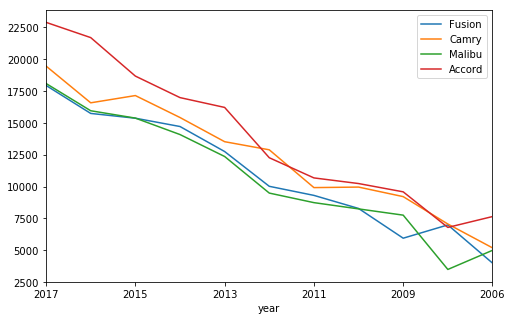

In [67]:
#### let's pick some of the most selling sedans in America
### Accord 本田雅阁, Camry 丰田凯美瑞 , Fusion 福特蒙迪欧, Malibu 雪弗兰迈锐宝
### these cars fall into the same category 

compare_models(["Fusion","Camry","Malibu","Accord"])

In [68]:
### compare the average magnitude of price decrease for Camry and Fusion

fusion = data[data["model"] == "Fusion"]
fusin_price_diff = fusion[["price",'year']].groupby("year").mean().sort_index(ascending=False)["price"].diff()
fusion_price_diff_mean = fusin_price_diff.mean()


camry = data[data["model"] == "Camry"]
camry_price_diff = camry[["price",'year']].groupby("year").mean().sort_index(ascending=False)["price"].diff()
camry_price_diff_mean = camry_price_diff.mean()

print("Ford Fusion price drops about ",fusion_price_diff_mean," dollars every year")
print("Toyota Camry price drops about ",camry_price_diff_mean," dollars every year")


Ford Fusion price drops about  -1393.3018181818181  dollars every year
Toyota Camry price drops about  -1014.7058823529412  dollars every year


In [31]:
#### Looks like Camry can retrain about $380 more of its value than Fusion does every year for used car

#### Let's build a linear regression model to get a picture of how different factors affect price of a used car

In [69]:
## we will choose linear regression model from the statsmodels instead of sklearn as it provides a more detailed summary

### select cars that we want to study

model_data = data[(data["model"] == "Fusion")
                    |(data["model"] == "Camry")
                    |((data["model"] == "Accord"))
                    |((data["model"] == "Malibu"))]

### create dummy variables for models
model_dummies = pd.get_dummies(model_data["model"])

### create dummy variables for status
status_dummies = pd.get_dummies(model_data["status"])

### get years of used car
model_data["years"] = 2017-model_data["year"].astype("float")

### add dummy variables to the dataframe and drop other columns
model_data = pd.concat([model_data,status_dummies,model_dummies],axis=1,join="inner")
model_data.drop(["body_style","year","make","model","status","exterior_color","interior_color","transmission","drive_train"],axis=1,inplace=True)

model_data.head()

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,price,mileage,years,Certified,Used,Accord,Camry,Fusion,Malibu
2907,15030.0,37753,2.0,0,1,0,0,1,0
2908,15030.0,37753,2.0,0,1,0,0,1,0
2909,14988.0,60133,4.0,0,1,0,0,1,0
2910,15250.0,32836,1.0,0,1,0,0,1,0
2913,15230.0,35427,3.0,0,1,0,0,1,0


In [70]:
#### our linear regression model will fit this data

model_x = model_data[list(model_data.columns)[1:]]

### add the constant columns

model_x_cons = sm.add_constant(model_x,prepend=False)

model_y = model_data["price"]

model = sm.OLS(model_y.astype("float"),model_x_cons.astype("float"))
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     1128.
Date:                Mon, 13 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:21:06   Log-Likelihood:                -17423.
No. Observations:                1949   AIC:                         3.486e+04
Df Residuals:                    1942   BIC:                         3.490e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mileage       -0.0602      0.003    -18.659      0.0

In [ ]:
#### we can see from the summary: (a rough estimation)

#  model fits the data pretty well, R_square = 0.777, all independent variables are statistically significant

# 1. a certified used car worths about 400 more than a non-certified used car in average
# 2. brand certainly plays a big role here, among these four brands, Accord is most valuable
# 3. 1 mileage of usage actually reduce 0.06 dollars of a car's value